In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

2023-07-08 14:59:14.013131: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-08 14:59:14.078269: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-08 14:59:14.960300: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/tanzid/miniconda3/envs/tf/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_t

We will now train a model to do sentiment analysis using the IMDB movie reviews dataset, in particular, using the sub word tokenized data

In [2]:
# load both the plain text data and tokenized subwords data
imdb_plaintext, info_plaintext = tfds.load("imdb_reviews", with_info=True, as_supervised=True) 
imdb_subwords, info_subwords = tfds.load("imdb_reviews/subwords8k", with_info=True, as_supervised=True) 

In [5]:
# description of plaintext features and some sample sentences
print(info_plaintext.features)
for example in imdb_plaintext['train'].take(3):
    print(example)

FeaturesDict({
    'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    'text': Text(shape=(), dtype=string),
})
(<tf.Tensor: shape=(), dtype=string, numpy=b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.">, <tf.Tensor: shape=(), dtype=int64, numpy=0>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'I have been known to fall asl

2023-07-08 15:09:10.157862: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_2' with dtype string and shape [1]
	 [[{{node Placeholder/_2}}]]
2023-07-08 15:09:10.158282: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype string and shape [1]
	 [[{{node Placeholder/_1}}]]
2023-07-08 15:09:10.257495: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline 

In [7]:
# description of tokenized subword features and some sample sentences
print(info_subwords.features)
for example in imdb_subwords['train'].take(3):
    print(example)
    print()

FeaturesDict({
    'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    'text': Text(shape=(None,), dtype=int64, encoder=<SubwordTextEncoder vocab_size=8185>),
})
(<tf.Tensor: shape=(163,), dtype=int64, numpy=
array([  62,   18,   41,  604,  927,   65,    3,  644, 7968,   21,   35,
       5096,   36,   11,   43, 2948, 5240,  102,   50,  681, 7862, 1244,
          3, 3266,   29,  122,  640,    2,   26,   14,  279,  438,   35,
         79,  349,  384,   11, 1991,    3,  492,   79,  122,  188,  117,
         33, 4047, 4531,   14,   65, 7968,    8, 1819, 3947,    3,   62,
         27,    9,   41,  577, 5044, 2629, 2552, 7193, 7961, 3642,    3,
         19,  107, 3903,  225,   85,  198,   72,    1, 1512,  738, 2347,
        102, 6245,    8,   85,  308,   79, 6936, 7961,   23, 4981, 8044,
          3, 6429, 7961, 1141, 1335, 1848, 4848,   55, 3601, 4217, 8050,
          2,    5,   59, 3831, 1484, 8040, 7974,  174, 5773,   22, 5240,
        102,   18,  247,   26,    4, 3903, 1612, 3

2023-07-08 15:14:50.208018: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int64 and shape [1]
	 [[{{node Placeholder/_4}}]]
2023-07-08 15:14:50.208509: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1]
	 [[{{node Placeholder/_0}}]]
2023-07-08 15:14:50.298890: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline s

In [10]:
# get the encoder object and decode some of the subword sequences to look at the actual text subwords
tokenizer_subwords = info_subwords.features['text'].encoder

for example in imdb_subwords['train'].take(2):
    print(tokenizer_subwords.decode(example[0]))

This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.
I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was cons

2023-07-08 15:16:02.749807: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype string and shape [1]
	 [[{{node Placeholder/_1}}]]
2023-07-08 15:16:02.750178: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1]
	 [[{{node Placeholder/_0}}]]
2023-07-08 15:16:02.858378: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline 

In [46]:
# show the sub word tokens
print(tokenizer_subwords.subwords)
print(f"Subword vocab size: {tokenizer_subwords.vocab_size}")

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 't_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', ' (', 'are_', 'his_', 'have_', 'film_', 'not_', 'ing_', 'be_', 'ed_', 'you_', ' "', 'it', 'd_', 'an_', 'he_', 'by_', 'at_', 'one_', 'who_', 'y_', 'from_', 'e_', 'or_', 'all_', 'like_', 'they_', '" ', 'so_', 'just_', 'has_', ') ', 'her_', 'about_', 'out_', 'This_', 'some_', 'ly_', 'movie', 'film', 'very_', 'more_', 'It_', 'would_', 'what_', 'when_', 'which_', 'good_', 'if_', 'up_', 'only_', 'even_', 'their_', 'had_', 'really_', 'my_', 'can_', 'no_', 'were_', 'see_', 'she_', '? ', 'than_', '! ', 'there_', 'get_', 'been_', 'into_', ' - ', 'will_', 'much_', 'story_', 'because_', 'ing', 'time_', 'n_', 'we_', 'ed', 'me_', ': ', 'most_', 'other_', 'don', 'do_', 'm_', 'es_', 'how_', 'also_', 'make_', 'its_', 'could_', 'first_', 'any_', "' ", 'people_', 'great_', 've_', 'ly', 'er_', 'made_', 'r_', 'B

Note how the subword tokens also include spaces and punctuation symbols.

**Main advantage of using `subword tokenization`:** Typically, a reasonably large corpus of text will have ~10^5 distinct words/vocabulary size. Thus, if we restrict the voacbulary size for our tokenizer to lets say 10^4, then the encoded/tokenized sequences will have lots of OOV tokens so we're losing a lot of information. In contrast, the vocabulary of subwords will be much smaller since different words will have overlapping subwords (e.g. 'racing' and 'baking' both contain the subword 'ing') and so we can retain more information with smaller vocabulary size and therefore train more accurate models. Lets do some experiments to see this effect

In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# first lets generate the vocabulary using full words and create encoded seqeunecs of word indices
train_data = imdb_plaintext['train']
train_sentences = []

# get list of review sentences from training set
for review,_ in train_data:
    train_sentences.append(review.numpy().decode('utf8'))

# initialize tokenizer ()
vocab_size = 10000
oov_tok = "<OOV>"
tokenizer_plaintext = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# generate vocabulary
tokenizer_plaintext.fit_on_texts(train_sentences)

# generate encoded sequences
sequences = tokenizer_plaintext.texts_to_sequences(train_sentences)

2023-07-08 18:41:10.073546: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_2' with dtype string and shape [1]
	 [[{{node Placeholder/_2}}]]
2023-07-08 18:41:10.073841: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype string and shape [1]
	 [[{{node Placeholder/_1}}]]


In [39]:
import numpy as np

# now lets sample some sequences randomly, decode them back to plaintext and see how many OOV tokens they contain and compute the average 
# fraction of OOV tokens
idx = np.random.choice(np.arange(len(train_sentences)), size=5, replace=False) 
for i in idx:
    print(f"Original sentence: \t{train_sentences[i]}")
    print(f"Tokenized sentence: \t{sequences[i]}")
    # decode
    decoded_string = tokenizer_plaintext.sequences_to_texts(sequences[i:i+1])
    print(f"Decoded sentence: \t{decoded_string[0]}")
    print()


idx = np.random.choice(np.arange(len(sequences)), size=500, replace=False) 
num_oov = 0
num_words = 0
for i in idx:
    decoded_plaintext = tokenizer_plaintext.sequences_to_texts(sequences[i:i+1])
    decoded_words = decoded_plaintext[0].split()
    #print(decoded_plaintext)
    #print(f"Percentage of OOV tokens = {decoded_words.count('<OOV>')/len(decoded_words)}")
    #print()
    num_oov += decoded_words.count('<OOV>')
    num_words += len(decoded_words)

average_oov_per_sequence = num_oov / num_words
print(f"Average fraction of oov tokens per sequence from 500 randomly sampled sequences: {average_oov_per_sequence}")   
print(f"Restricted vocab size: {vocab_size}") 
print(f"Original vocab size: {len(tokenizer_plaintext.word_index)}") 

Original sentence: 	I've read a number of reviews on this film and I have to say "What is wrong with you people?!?!" This was an excellent film! I thought this film was superb from start to finish and the story was extremely well told. I'm convinced that the people that didn't like this film weren't paying very good attention to the film. There are a number of very important scenes that if you aren't paying attention you will be confused and the following scenes may not make sense. I urge anyone who didn't like this film to watch it again and watch it alone so that you can truly pay attention. The story made perfect sense to me and as I said, was very well told. Every scene in the film has a point and everything fits together at the end of the film.<br /><br />All the actors did a fantastic job! Sean Connery was very good in his role as always. Laurence Fishburne was superb as Tanny Brown, playing a very interesting character. Kate Capshaw was a nice touch as well, and looks fantastic.

On average, it looks like at least 5%  of the words in the encoded sequences contain OOV tokens. In contrast, the subword vocabulary size is about 8k, which is less than the 10000 word reswtricted vocabulary for the full words that we used, and it can still encode with zero OOV tokens.

In [37]:
# now lets sample some sentences randomly, encode them using the subword tokenizer, then decode them back to plaintext and see how many OOV tokens they contain 
idx = np.random.choice(np.arange(len(train_sentences)), size=5, replace=False) 
for i in idx:
    print(f"Original sentence: \t{train_sentences[i]}")
    # encode 
    tokenized_string =  tokenizer_subwords.encode(train_sentences[i])
    print(f"Tokenized sentence: \t{tokenized_string}")
    # decode
    decoded_string = tokenizer_subwords.decode(tokenized_string)
    print(f"Decoded sentence: \t{decoded_string}")
    print()


Original sentence: 	A great film requiring an acquired taste. If you're into action, wham bam films and hate serious love stories then its not for you. Otherwise, if you like to sit in front of a good intelligent movie now and again I recommend this very highly. Easily the best film produced in Bollywood this century.<br /><br />The only other Indian film I would give 10/10 for is Dil Wale Dulhaniya Le Jayenge. Even then it comes second to this masterpiece.
Tokenized sentence: 	[133, 122, 32, 376, 6796, 34, 41, 6823, 2504, 40, 3104, 3, 156, 151, 7968, 182, 94, 827, 2, 7524, 111, 1057, 111, 185, 5, 1479, 1187, 174, 1144, 144, 116, 33, 23, 151, 3, 4976, 1858, 2, 75, 37, 52, 7, 1369, 11, 1867, 6, 4, 74, 2818, 27, 338, 5, 477, 12, 505, 14, 67, 1559, 124, 3, 2300, 3574, 47, 1, 175, 32, 2691, 11, 4257, 6830, 6448, 7961, 14, 5858, 8050, 24, 10, 16, 10, 17, 19, 77, 108, 3348, 32, 12, 70, 257, 283, 7976, 467, 23, 9, 1266, 157, 2299, 49, 718, 8037, 2898, 8034, 849, 7961, 1095, 7961, 7080, 3724, 

Now lets take a test sentence, encode it using both the plaintext and subword tokenizers and then look at the decoded strings.

In [41]:
test_sentence = "Tensorflow, from basics to mastery"

# generate encoded sequences
sequence_plaintext = tokenizer_plaintext.texts_to_sequences([test_sentence])
sequence_subword = tokenizer_subwords.encode(test_sentence)
print(f"Plaintext encoding: {sequence_plaintext}")
print(f"Subword encoding: {sequence_subword}")


decoded_plaintext = tokenizer_plaintext.sequences_to_texts(sequence_plaintext)
decoded_subword = tokenizer_subwords.decode(sequence_subword)
print(f"Plaintext decoding: {decoded_plaintext}")
print(f"Subword decoding: {decoded_subword}")


Plaintext encoding: [[1, 37, 1, 6, 1]]
Subword encoding: [6307, 2327, 2934, 2, 48, 4249, 4429, 7, 2652, 8050]
Plaintext decoding: ['<OOV> from <OOV> to <OOV>']
Subword decoding: Tensorflow, from basics to mastery


Note that 3 out of 5 of the decoded words are OOV tokens for the plaintext encoding, while the subword decoding preserves all the information from the original sentence and can perfectly reconstruct the original sentence. The only downside is that the subword encoding sequences are much longer than the full word encoding sequences.

Now lets train a model on the subword data.

In [43]:
# get the train and test splits (these are tf.data.Dataset ob jects)
train_data, test_data = imdb_subwords['train'], imdb_subwords['test']

# shuffle the training data
train_dataset = train_data.shuffle(buffer_size=10000)

# pad the sequences (to longest sequence) and create batches
BATCH_SIZE = 36
train_dataset = train_dataset.padded_batch(batch_size=BATCH_SIZE)
test_dataset = test_data.padded_batch(batch_size=BATCH_SIZE)

In [50]:
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D

embedding_dim = 64

# build the model
model = tf.keras.models.Sequential([Embedding(tokenizer_subwords.vocab_size, embedding_dim), 
                                    GlobalAveragePooling1D(),
                                    Dense(units=6, activation='relu'),
                                    Dense(units=1, activation='sigmoid')])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 64)          523840    
                                                                 
 global_average_pooling1d_1   (None, 64)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_2 (Dense)             (None, 6)                 390       
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________


In [51]:
num_epochs = 10

# compile and train the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_dataset, validation_data=test_dataset, epochs=num_epochs)

Epoch 1/10


695/695 [==============================] - 5s 6ms/step - loss: 0.6383 - accuracy: 0.6754 - val_loss: 0.5190 - val_accuracy: 0.8174
Epoch 2/10
695/695 [==============================] - 4s 6ms/step - loss: 0.4001 - accuracy: 0.8586 - val_loss: 0.3636 - val_accuracy: 0.8606
Epoch 3/10
695/695 [==============================] - 4s 6ms/step - loss: 0.2937 - accuracy: 0.8955 - val_loss: 0.3206 - val_accuracy: 0.8728
Epoch 4/10
695/695 [==============================] - 4s 6ms/step - loss: 0.2482 - accuracy: 0.9111 - val_loss: 0.3071 - val_accuracy: 0.8793
Epoch 5/10
695/695 [==============================] - 4s 6ms/step - loss: 0.2194 - accuracy: 0.9236 - val_loss: 0.3160 - val_accuracy: 0.8757
Epoch 6/10
695/695 [==============================] - 4s 6ms/step - loss: 0.1983 - accuracy: 0.9305 - val_loss: 0.3088 - val_accuracy: 0.8818
Epoch 7/10
695/695 [==============================] - 5s 6ms/step - loss: 0.1804 - accuracy: 0.9360 - val_loss: 0.3219 - val_accuracy: 0.8766
Epoch 8/10
695/69

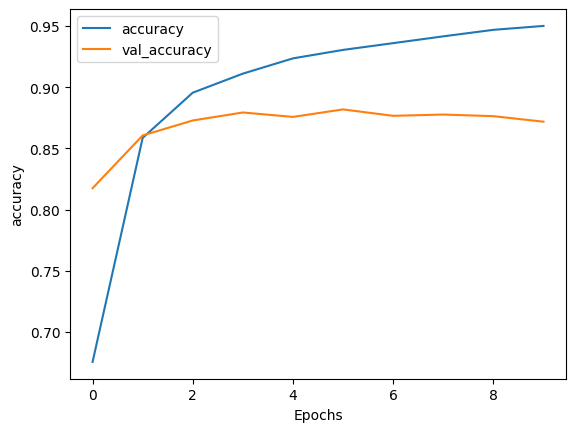

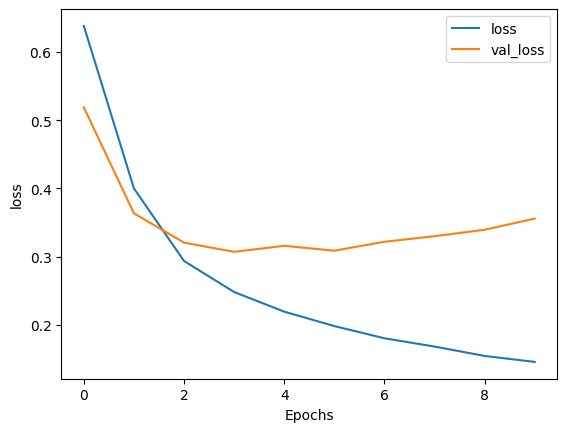

In [53]:
import matplotlib.pyplot as plt 

# lets now plot some learning curves
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history["val_"+metric])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, "val_"+metric])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")
